# Basic Modulation Example

Ericsson Nikola Tesla - DSP Hackaton 2021

### 0. Imports

In [1]:
from numpy import exp, pi, absolute, arange, reshape, random, array, round, zeros, linspace
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift

### 1. Helper Methods

In [2]:
def spectrum01(x,fs):
    N=len(x)
    Nfft=10*N
    X = fftshift(fft(x,Nfft))
    X=X/N
    m = np.max(np.abs(X))
    X = X/m
    f=fos(Nfft,fs)
    X=[20*np.log10(np.abs(x)) for x in X]
    plt.plot(f,X)
    plt.ylabel('Spectrum [dB/(\Delta Hz)]')
    plt.xlabel('Frequency[Hz]')
    plt.ylim(-100, 0)

    return

In [3]:
# Calculates the frequency axis for the spectral samples obtained by FFT
def fos( N, fs ):

    if (N <= 0) : 
        print('Number of samples must be a positive number greater than 0')


    if (fs <= 0) : 
        print('Number of samples must be a positive number greater than 0')

    deltaf = fs/N

    if (N%2==0 ) :  # even N
        f = linspace(-fs/2,fs/2-deltaf, num = N)
    else : # odd N
        f = linspace(-(fs-deltaf)/2,(fs-deltaf)/2,num = N)

    return f

### 2. Parameters

In [4]:
M = 4 # QAM 4 modulation
R = random.rand(1, 1024) 
b = round(R[0])
b = b.astype(int) # 1024 randomly generated bits

f0=10 # Carrier frequency [Hz]
TSimbola=0.3 # Symbol duration [s]
fSample=1000 # Sampling frequency
tSample=1/fSample # Sampling period

Ns=int(round(TSimbola/tSample)) # Number of samples per one symbol
BBS=int(math.log2(M)) # Number of bits per one symbol
L=len(b); # Number of bits to be transmitted

# Symbol forming
Sb=b.reshape(BBS,int(L/BBS)); # Every column one symbol
Ss = [0] * len(Sb[0])
# Convert every two bits to a number [0,3]
for i in range(len(Sb[0])):
    Ss[i]=2 * Sb[0][i] + Sb[1][i]

###  3. Mapping Symbols To Constellation

Text(0, 0.5, 'Imag')

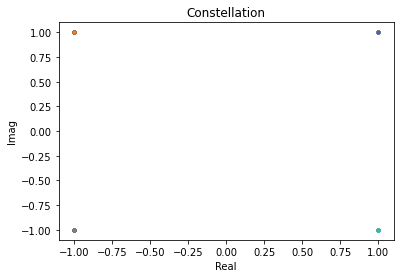

In [5]:
Constellation=[1+1j, -1+1j, 1-1j, -1-1j] #Symbol map definition
Ac  = zeros((1,len(Ss)), dtype=complex)

# Searching the map
for i in range(len(Ss)):   
    index = int(Ss[i])
    Ac[0][i]=Constellation[index]

plt.figure(1)
plt.plot(Ac.real,Ac.imag,'.')
plt.title('Constellation')
plt.xlabel('Real')
plt.ylabel('Imag')

### 4. Modulation

Text(0, 0.5, 'Amplitude')

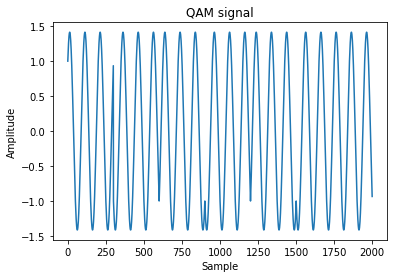

In [6]:
t=arange(Ns)*tSample
uQAM = []
Signal_ks = zeros((len(t),), dtype=complex)
C = exp(-1j*2*pi*f0*t) # Complex signal carrier
E = Ac[0]

# Generating the signal
for ks in range(len(E)): 
    for i in range(Ns):
        Signal_ks[i]=E[ks] * C[i]   # Multiplying by complex carrier
    uQAM.extend(Signal_ks.real) # Appending the current symbol to the end of the signal

    
plt.figure(2)
plt.plot(uQAM[:2000]) # Zoom in to see the waveform
plt.title('QAM signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

### 5. Spectrum

C:\Users\edinpac\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


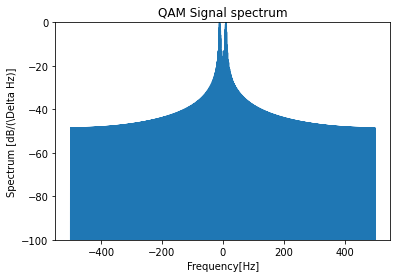

In [7]:
plt.figure(3)
spectrum01(uQAM,fSample)
plt.title('QAM Signal spectrum')
plt.show()